In [1]:
import sys
sys.path.append(r"C:\Users\afeki\Desktop\code\CrossValidatedFeatureSelection\experiments")
from plot_utils import get_results_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
FOLDER = "C:/Users/afeki/Desktop/code/CrossValidatedFeatureSelection/experiments/gbm_classification/simulations/null/"
fi, metrics = get_results_data(FOLDER, normalize=False, one_hot=False)
fi_norm, _ = get_results_data(FOLDER, normalize=True, one_hot=False)
fi_norm  = fi_norm.fillna(0)
df_map = { 'gain': 'Gain', 'permutation_test' : "Permutation", 'permutation_train' : 'Permutation Train', 'shap_test': 'Shap','shap_train': 'Shap Train'}
model_map = {'LGBM' : 'LGBM', 'CATBOOST' : 'CatBoost', 'Ours' : 'CVB', 'Vanilla_GBM' : 'Vanilla GBM', 'SKLEARN_MI' : 'SKLEARN Mean Imputing','XGBOOST_MI' : 'XGBOOST Mean Imputing'}
metrics['model'] = metrics['model'].map(model_map)

def translate_value_names(df):
    df['fi_type'] = df['fi_type'].map(df_map)
    df['model'] = df['model'].map(model_map)
    
translate_value_names(fi), translate_value_names(fi_norm)

(None, None)

# Permuatation

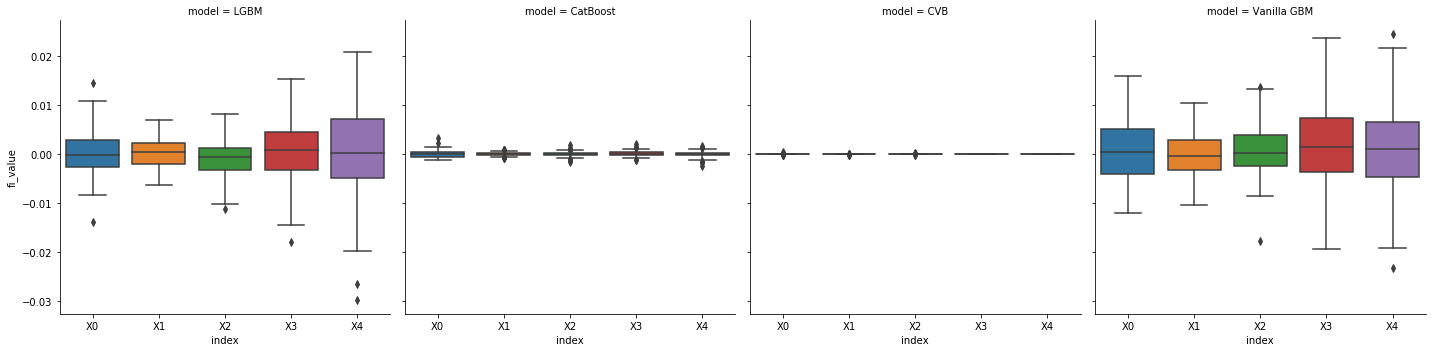

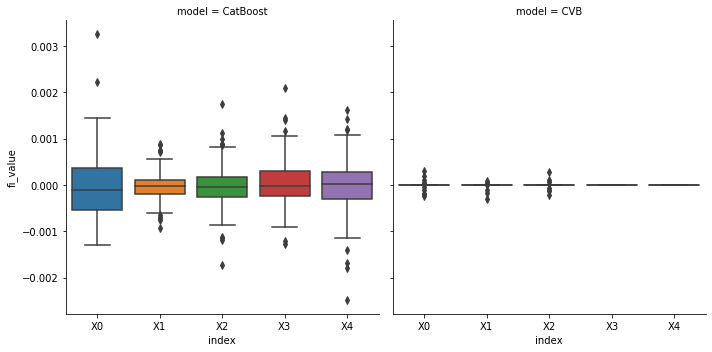

In [3]:
g = sns.catplot(x="index", y="fi_value",kind ='box',
                col="model", data=fi[(fi['fi_type'] == 'Permutation')&(fi['model'].isin(['LGBM', 'Vanilla GBM', 'CatBoost', 'CVB']))])
plt.show()
g = sns.catplot(x="index", y="fi_value",kind ='box',
                col="model", data=fi[(fi['fi_type'] == 'Permutation')&(fi['model'].isin(['CatBoost', 'CVB']))])
plt.show()

# Gain

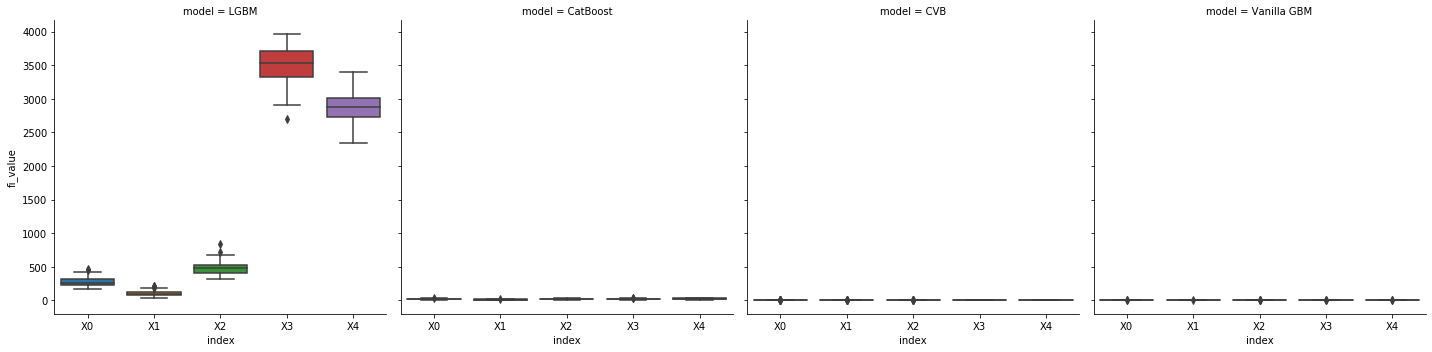

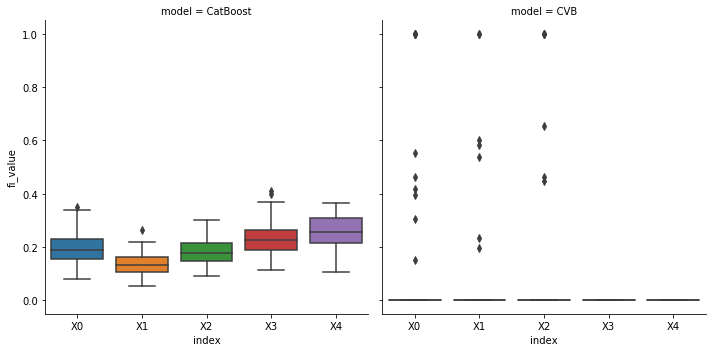

In [4]:
g = sns.catplot(x="index", y="fi_value",kind ='box',
                col="model", data=fi[(fi['fi_type'] == 'Gain')&(fi['model'].isin(['LGBM', 'Vanilla GBM','CatBoost', 'CVB']))])
plt.show()


g = sns.catplot(x="index", y="fi_value",kind ='box',
                col="model", data=fi_norm[(fi_norm['fi_type'] == 'Gain')&(fi_norm['model'].isin(['CatBoost', 'CVB']))])

plt.show()


# Shap

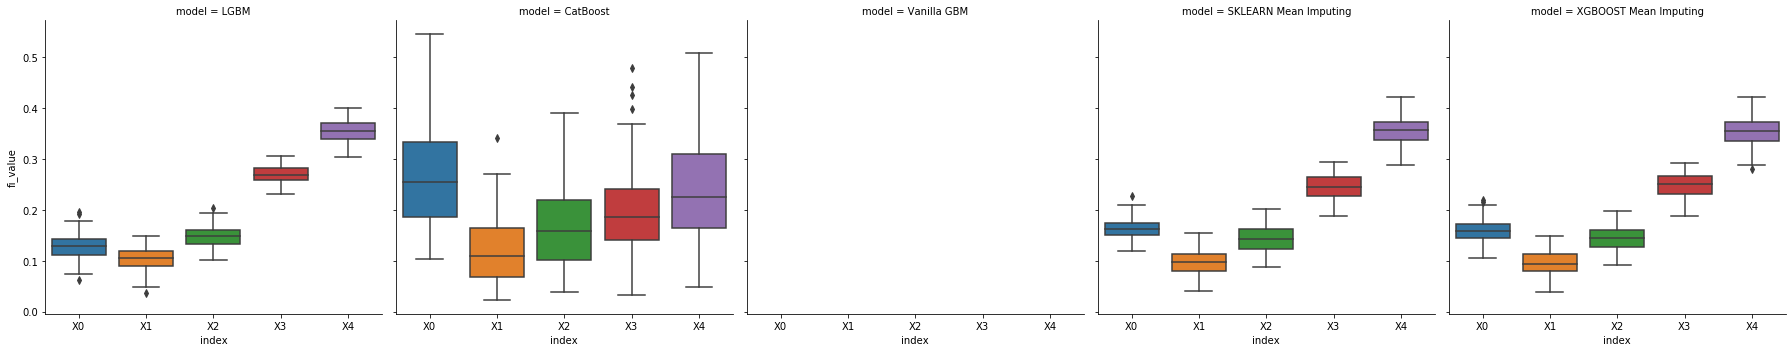

In [5]:
g = sns.catplot(x="index", y="fi_value",kind ='box',
                col="model", data=fi[(fi['fi_type'] == 'Shap')
                                    ])
plt.show()

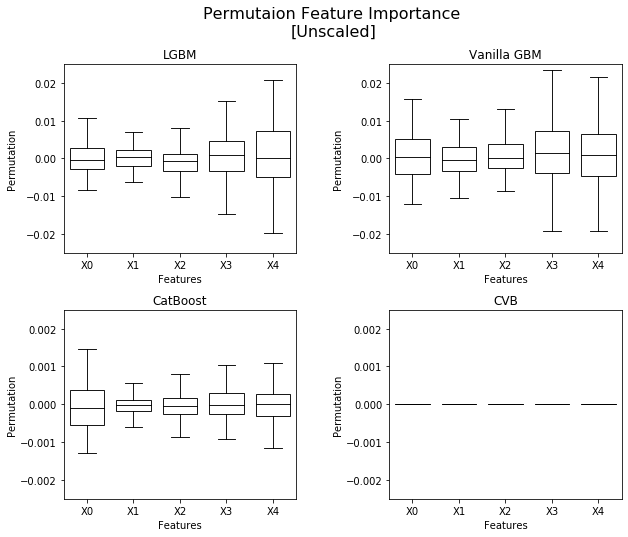

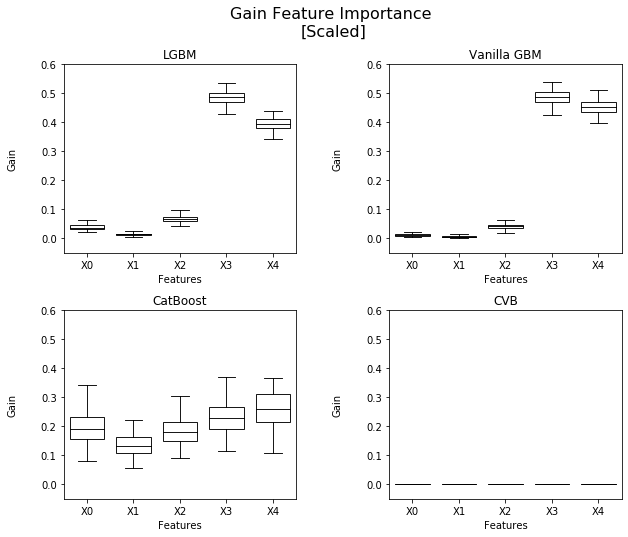

In [6]:
models = ['LGBM', 'Vanilla GBM', 'CatBoost', 'CVB']

def first_paper_graph(df,title, fi, y_min_zero = False):
    data = df.copy()
    data.columns = ['Features', "Feature Importance Type", fi, 'exp','Model']
    fig,a =  plt.subplots(2,2,  figsize=(10, 8))
    plt.subplots_adjust(wspace = 0.4, hspace = 0.3)
    get_y_min = lambda x: 0 if y_min_zero else -x
    counter = 0
    for i in range(2):
        for j in range(2):
            temp_model = models[counter]
            plot_data = data[(data.Model == temp_model) & (data[ "Feature Importance Type"] == fi)]
            ylim = plot_data[fi].apply(np.abs).max()
            a[i][j].set_title(temp_model)
            a[i][j].set_ylim(get_y_min(ylim)*1.2,ylim*1.2)
            if fi == 'Gain':
                a[i][j].set_ylim(-0.05,0.6)
#                 if temp_model in ['CatBoost', 'CVB']:
#                     a[i][j].set_ylim(0,0.4)
            if fi == 'Permutation':
                a[i][j].set_ylim(-0.025,0.025)
                if temp_model in ['CatBoost', 'CVB']:
                    a[i][j].set_ylim(-0.0025,0.0025)
            a[i][j].yaxis.set_label_coords(-0.2, 0.5)
            
            boxprops = {'edgecolor': 'k', 'linewidth': 0.9, 'facecolor': 'w'}
            lineprops = {'color': 'k', 'linewidth': 0.9}
            boxplot_kwargs = dict({'boxprops': boxprops, 'medianprops': lineprops,
                                   'whiskerprops': lineprops, 'capprops': lineprops,
                                   'width': 0.75})
            
            sns.boxplot(x='Features', y=fi,data=plot_data, ax = a[i][j], showfliers=False, **boxplot_kwargs)
           
            counter += 1
    fig.suptitle(title, fontsize=16)
    fig.savefig(F"{fi}.png")
    plt.show()
            
            
first_paper_graph(fi,'Permutaion Feature Importance \n[Unscaled]', 'Permutation') 
first_paper_graph(fi_norm,'Gain Feature Importance \n[Scaled]', 'Gain',True) 

## Shap

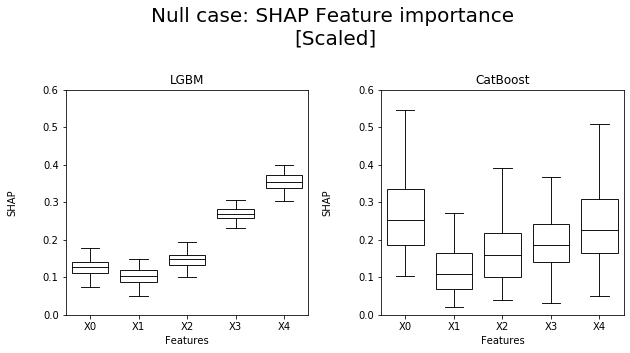

In [7]:
models = ['LGBM', 'CatBoost']

def first_paper_graph(df,title, fi, y_min_zero = False):
    data = df.copy()
    data.columns = ['Features', "Feature Importance Type", fi, 'exp','Model']
    fig,a =  plt.subplots(1,2,  figsize=(10, 5))
    plt.subplots_adjust(wspace = 0.3, hspace = 0, top=0.75)
    get_y_min = lambda x: 0 if y_min_zero else -x
    counter = 0
    for i in range(2):
        temp_model = models[counter]
        plot_data = data[(data.Model == temp_model) & (data[ "Feature Importance Type"] == fi)]
        ylim = plot_data[fi].apply(np.abs).max()
        a[i].set_title(temp_model)
        a[i].set_ylim(0,0.6)
        a[i].yaxis.set_label_coords(-0.2, 0.5)

        boxprops = {'edgecolor': 'k', 'linewidth': 0.9, 'facecolor': 'w'}
        lineprops = {'color': 'k', 'linewidth': 0.9}
        boxplot_kwargs = dict({'boxprops': boxprops, 'medianprops': lineprops,
                               'whiskerprops': lineprops, 'capprops': lineprops,
                               'width': 0.75})
            
        sns.boxplot(x='Features', y=fi,data=plot_data, ax = a[i], showfliers=False, **boxplot_kwargs)
        a[i].set_ylabel('SHAP')
           
        counter += 1
    fig.suptitle(F"{title}", fontsize=20)
#     fig.tight_layout(rect=[0, 0, 1, 0.9])
    fig.savefig(F"{fi}.png")
    plt.show()
            
            
first_paper_graph(fi_norm,'Null case: SHAP Feature importance \n[Scaled]', 'Shap') 

In [8]:
import cv2
import numpy as np

im1 = cv2.imread('Gain.png')
im2 = cv2.imread('Permutation.png')

cut = 30
im_h = cv2.hconcat([im1[:,cut:], im2[:,cut:]])
cv2.imwrite('null_exp.jpg', im_h)

True

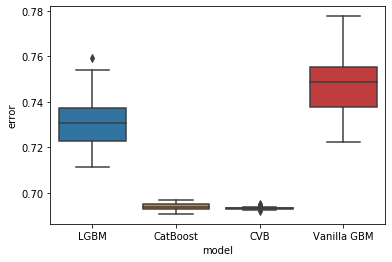

\begin{tabular}{ll}
\toprule
{} &          logloss \\
model       &                  \\
\midrule
CVB         &  0.6933 ± 0.0004 \\
CatBoost    &  0.6939 ± 0.0013 \\
LGBM        &  0.7313 ± 0.0102 \\
Vanilla GBM &  0.7472 ± 0.0118 \\
\bottomrule
\end{tabular}



In [9]:
models = ['Vanilla GBM', 'LGBM', 'CatBoost', 'CVB']
metrics = metrics[metrics.model.isin(models)]
sns.boxplot(x = 'model',y= 'error',data =metrics)
plt.show()

df = metrics.groupby('model')['error'].agg(['mean','std'])
df = df.round(4)
df['logloss'] = df['mean'].astype(str) + u" \u00B1 " + df['std'].astype(str)

print(df[['logloss']].to_latex())
# print(df.to_latex())